In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [16]:
bank=pd.read_excel(r"C:\Users\subha\Desktop\notebooks\Bank_Personal_Loan_Modelling.xlsx",'Data' )

In [17]:
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [18]:
bank.shape

(5000, 14)

In [19]:
bank.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [21]:
bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [22]:
bank.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

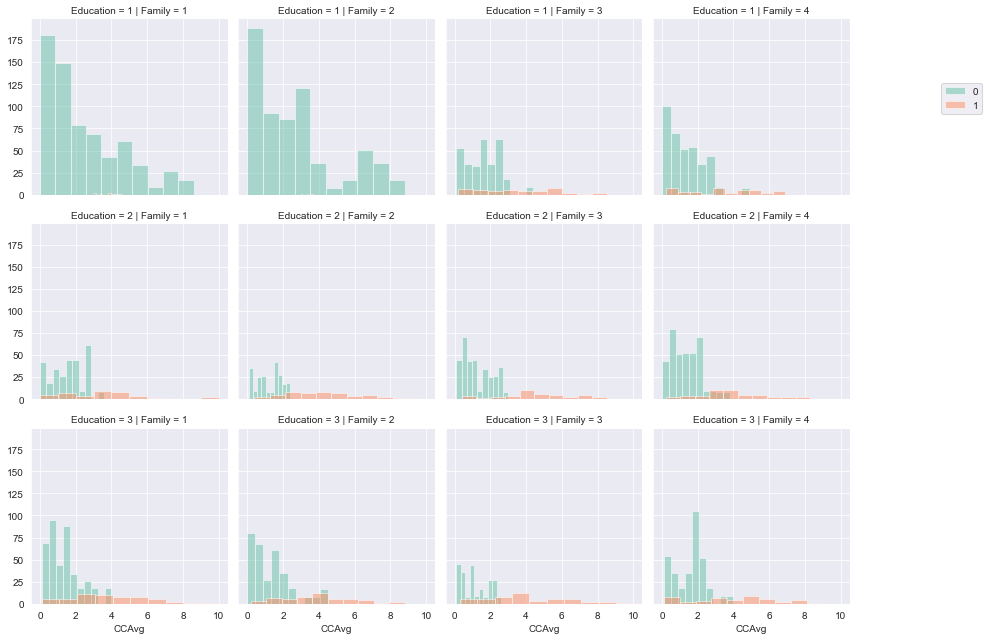

In [25]:
sns.set_style('darkgrid')
g=sns.FacetGrid(bank,row='Education',col='Family',hue='Personal Loan',palette='Set2')
g=g.map(plt.hist,'CCAvg',alpha=0.5)
plt.legend(bbox_to_anchor=(1.7,3))

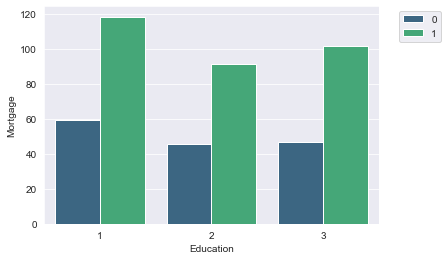

In [28]:
sns.barplot('Education','Mortgage',hue='Personal Loan',data=bank,palette='viridis',ci=None)
plt.legend(bbox_to_anchor=(1.2,1))

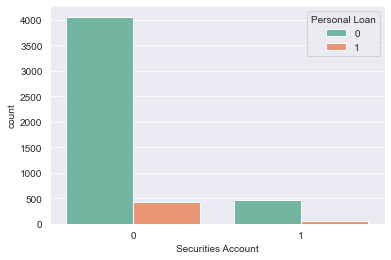

In [29]:
sns.countplot(x='Securities Account',hue='Personal Loan',data=bank,palette='Set2')

In [30]:
bank.columns


Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [31]:
x=pd.DataFrame(columns=['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','CreditCard','Online'],data=bank)
y=bank['Personal Loan']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [35]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
y_train_pred=dt.predict(x_train)
y_test_pred=dt.predict(x_test)

In [42]:
print(f1_score(y_test,y_test_pred))

0.9130434782608695


In [45]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test,y_test_pred)

0.984


array([[1125,   12],
       [   8,  105]], dtype=int64)

In [46]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

1.0


array([[3383,    0],
       [   0,  367]], dtype=int64)

In [47]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1137
           1       0.90      0.93      0.91       113

    accuracy                           0.98      1250
   macro avg       0.95      0.96      0.95      1250
weighted avg       0.98      0.98      0.98      1250



In [66]:
prdc=dt.predict(x_test)


In [72]:
print(classification_report(y_test,prdc))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1137
           1       0.08      0.08      0.08       113

    accuracy                           0.83      1250
   macro avg       0.49      0.49      0.49      1250
weighted avg       0.83      0.83      0.83      1250



In [73]:
print(confusion_matrix(y_test,prdc))

[[1029  108]
 [ 104    9]]


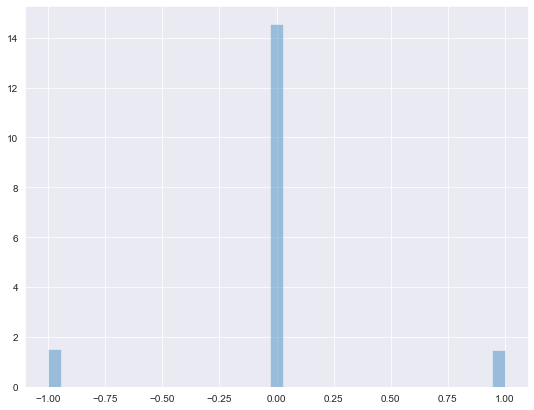

In [71]:
plt.figure(figsize=(9,7))
sns.distplot(y_test-predictions)